DM d'informatique: Louise PHILIBERT-NICOL
J'ai décié de m'intéresser à la pollution de l'air, pour cela j'ai récupéré une base de donnée contenant les staux de NO2 et O3 heure par heure dans l'air à Paris entre les années 2008 et 2016. Les données sont en microgrammes par mètres cube
Commençons tout d'abord par importer les données :


In [1]:
import numpy as np
import pandas as pd
from download import download
url = "http://josephsalmon.eu/enseignement/datasets/20080421_20160927-PA13_auto.csv"
path_target = "./20080421_20160927-PA13_auto.csv"
download(url, path_target, replace=False)

df = pd.read_csv('20080421_20160927-PA13_auto.csv', sep=';',comment='#', na_values="n/d",converters={'heure': str})





Replace is False and data exists, so doing nothing. Use replace=True to re-download the data.


Affichons les 25 premières lignes de notre tableau de données

In [2]:
df.head(25)

,date,heure,NO2,O3
0,21/04/2008,1,13.0,74.0
1,21/04/2008,2,11.0,73.0
2,21/04/2008,3,13.0,64.0
3,21/04/2008,4,23.0,46.0
4,21/04/2008,5,47.0,24.0
5,21/04/2008,6,70.0,11.0
6,21/04/2008,7,70.0,17.0
7,21/04/2008,8,76.0,16.0
8,21/04/2008,9,NaN,NaN
9,21/04/2008,10,NaN,NaN


Intéressons nous maintenant aux statistiques que l'on peut tirer de nos données. 

In [3]:
df.describe()

,NO2,O3
count,71008.000000,71452.000000
mean,34.453414,39.610046
std,20.380702,28.837333
min,1.000000,0.000000
25%,19.000000,16.000000
50%,30.000000,38.000000
75%,46.000000,58.000000
max,167.000000,211.000000


On peut comparer les résultats obtenus avec les objectifs annoncés de qualité de l'air . L'objectif est de ne pas dépasser 40 microgrammes de NO2 par mètre cube ce qui est en moyenne bien respecté. Le seuil d'aletre de 400 microgramme par mètres cubes de NO2 n'est pas dépassé non plus. Concernant l'ozone le seuil d'aletre de 240 microgramme par mètres cubes n'est pas dépassé non plus. 
Intéressons nous maintenant à la taille de notre tableau de données

In [4]:
df.shape

(73920, 4)

Intéressons nous au nombre d'heures passées au dessus du seuil de 40 microgrammes de NO2 par mètre cube

In [5]:
limite_dépassée_NO2 = (df['NO2'] >40) 
nb_heures_NO2=limite_dépassée_NO2.sum()
nb_heures_NO2

23138

Concernant l'ozone l'objectif est de ne pas dépasser 120 microgrammes par mètre cube, regardons le nombre d'heures passées au dessus de cette limite entre 2008 et 2016

In [6]:
limite_dépassée_O3 = (df['O3'] >120) 
nb_heures_O3=limite_dépassée_O3.sum()
nb_heures_O3

757

Regardons l'évolution du taux de NO2 au cours du temps

<Axes: >

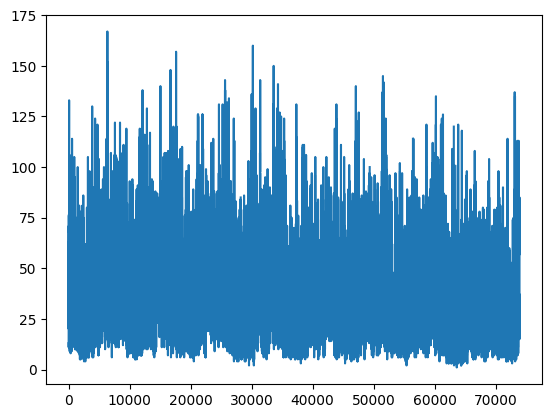

In [7]:
df.NO2.plot()

Regardons l'évolution du taux d'ozone au cours du temps

<Axes: >

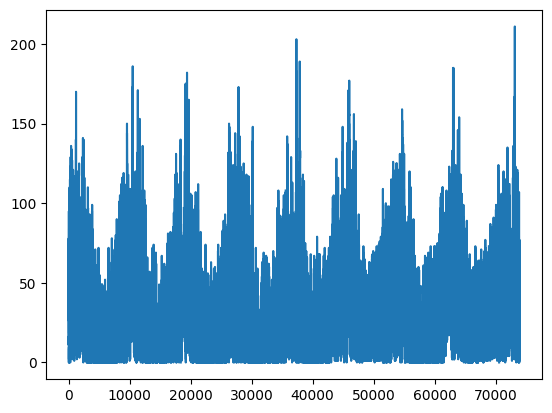

In [8]:
df.O3.plot()

Regardons cette fois la répartition des taux de NO2 enregistrés

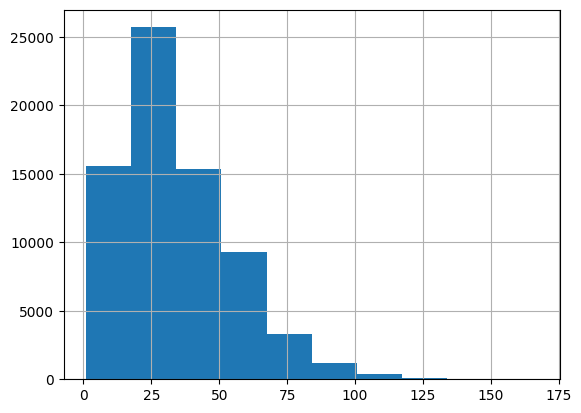

In [9]:
test=df["NO2"].hist()

Et maintenant la même chose pour l'ozone

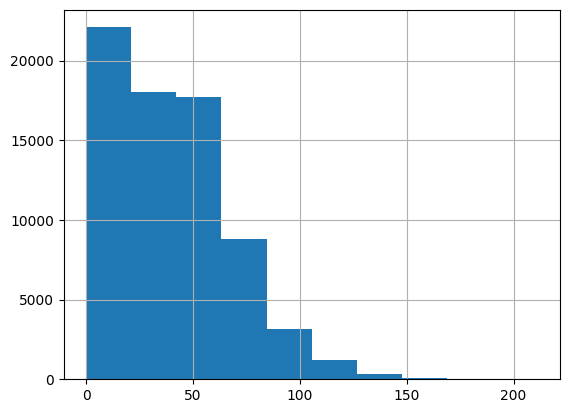

In [10]:
test2=df["O3"].hist()

Nous aurions pu afficher ces deux histogrammes en une seule fois:

array([[<Axes: title={'center': 'NO2'}>, <Axes: title={'center': 'O3'}>]],
      dtype=object)

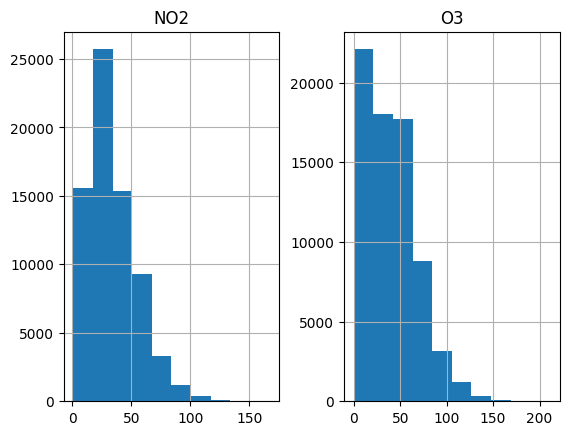

In [11]:
df.hist()


Essayons maintenant de nous intéresser au nombre de jours où l'objectif pour les atux de NO2 et d'ozone ont étés dépassés. Commençons avec le NO2. L'idée est qu'on regarde heure par heure si le taux enregistré est supérieur au seuil, et si oui si c'est le premier dépassement de la journée. On crée ensuite une nouvelle colonne à notre tableau de données contenant un 1 si l'heure associée correspond au premier dépassement de seuil de la journée et 0 sinon.

In [12]:
longueur = df.shape [0]
liste_date = []
liste_valeurs = []
for i in range(longueur):
    if df.loc[i,'NO2'] > 40 and df.loc[i,'date'] not in liste_date:
        liste_valeurs.append(1)
        liste_date.append(df.loc[i,'date'])
    else:
        liste_valeurs.append(0)


df['premier dépassement NO2'] = [k for k in liste_valeurs]

nb_jours_limite_dépassée_NO2 = (df['premier dépassement NO2'] > 0) 
nb_jours_NO2=nb_jours_limite_dépassée_NO2.sum()
print('Le seuil en NO2 a été dépassé ',nb_jours_NO2,' jours')       

Le seuil en NO2 a été dépassé  2392  jours


In [13]:
print('Soit en moyenne ', nb_heures_NO2/nb_jours_NO2, ' heures où le seuil est dépassé par jour où le seuil en NO2 est dépassé')

Soit en moyenne  9.673076923076923  heures où le seuil est dépassé par jour où le seuil en NO2 est dépassé


In [14]:
longueur = df.shape [0]
liste_date = []
liste_valeurs = []
for i in range(longueur):
    if df.loc[i,'O3'] > 120 and df.loc[i,'date'] not in liste_date:
        liste_valeurs.append(1)
        liste_date.append(df.loc[i,'date'])
    else:
        liste_valeurs.append(0)


df['premier dépassement O3'] = [k for k in liste_valeurs]

nb_jours_limite_dépassée_O3 = (df['premier dépassement O3'] > 0) 
nb_jours_O3=nb_jours_limite_dépassée_O3.sum()

print('Le seuil en O3 a été dépassé ',nb_jours_O3,' jours')

Le seuil en O3 a été dépassé  148  jours


In [15]:
print('Soit en moyenne ', nb_heures_O3/nb_jours_O3, ' heures où le seuil est dépassé par jour où le seuil en O3 est dépassé')

Soit en moyenne  5.114864864864865  heures où le seuil est dépassé par jour où le seuil en O3 est dépassé
